In [912]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [913]:
df = pd.read_csv('all_data.csv')
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,77860932152.0
1,Chile,2001,77.3,70979923960.0
2,Chile,2002,77.8,69736811435.0
3,Chile,2003,77.9,75643459840.0
4,Chile,2004,78.0,99210392858.0


In [914]:
df.rename(columns = {'Life expectancy at birth (years)': 'Life expectancy', 'GDP': 'GDP [in B]'}, inplace = True)
df

,Country,Year,Life expectancy,GDP [in B]
0,Chile,2000,77.3,77860932152.0
1,Chile,2001,77.3,70979923960.0
2,Chile,2002,77.8,69736811435.0
3,Chile,2003,77.9,75643459840.0
4,Chile,2004,78.0,99210392858.0
...,...,...,...,...
91,Zimbabwe,2011,54.9,12098450749.0
92,Zimbabwe,2012,56.6,14242490252.0
93,Zimbabwe,2013,58.0,15451768659.0
94,Zimbabwe,2014,59.2,15891049236.0


In [915]:
df['GDP [in B]'] = df['GDP [in B]']/10**9
df

,Country,Year,Life expectancy,GDP [in B]
0,Chile,2000,77.3,77.9
1,Chile,2001,77.3,71.0
2,Chile,2002,77.8,69.7
3,Chile,2003,77.9,75.6
4,Chile,2004,78.0,99.2
...,...,...,...,...
91,Zimbabwe,2011,54.9,12.1
92,Zimbabwe,2012,56.6,14.2
93,Zimbabwe,2013,58.0,15.5
94,Zimbabwe,2014,59.2,15.9


In [916]:
df1 = df[['Country', 'Year', 'GDP [in B]']]
df1 = df1.pivot_table(values = 'GDP [in B]', index = 'Country', columns= 'Year')
df1.rename(index={'Chile':'Chile', 'China':'China', 'Germany': 'Germany', 'Mexico':'Mexico', 'United States of America':'USA', 'Zimbabwe':'Zimbabwe'}, inplace=True)
df1

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,
Chile,77.9,71.0,69.7,75.6,99.2,123.0,154.8,173.6,179.6,172.4,218.5,252.3,267.1,278.4,261.0,242.5
China,1211.3,1339.4,1470.5,1660.3,1955.3,2286.0,2752.1,3552.2,4598.2,5109.9,6100.6,7572.6,8560.5,9607.2,10482.4,11064.7
Germany,1950.0,1950.7,2079.1,2505.7,2819.2,2861.4,3002.4,3439.9,3752.4,3418.0,3417.1,3757.7,3544.0,3752.5,3890.6,3375.6
Mexico,683.6,724.7,741.6,713.3,770.3,866.3,965.3,1043.5,1101.3,894.9,1051.1,1171.2,1186.6,1262.0,1298.5,1152.3
USA,10300.0,10600.0,11000.0,11500.0,12300.0,13100.0,13900.0,14500.0,14700.0,14400.0,15000.0,15500.0,16200.0,16700.0,17400.0,18100.0
Zimbabwe,6.7,6.8,6.3,5.7,5.8,5.8,5.4,5.3,4.4,8.6,10.1,12.1,14.2,15.5,15.9,16.3


In [917]:
country_lst = []
for x in df1.index:
    country_lst.append(x)
print(country_lst)

['Chile', 'China', 'Germany', 'Mexico', 'USA', 'Zimbabwe']


In [918]:
x_values = []

for x in df1.columns:
    x_values.append(x)
print(x_values)

[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]


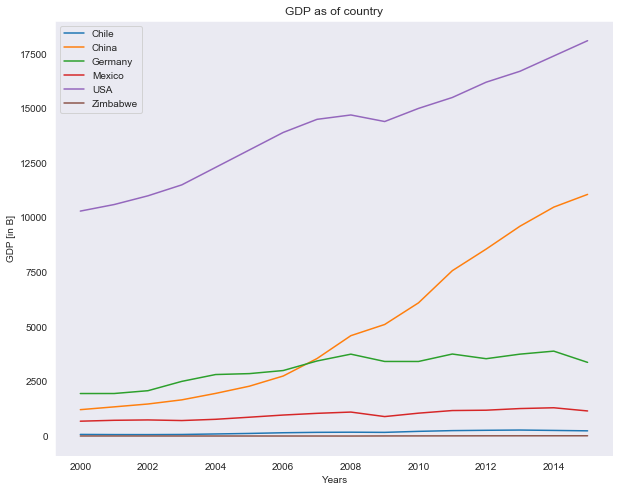

None


In [919]:
y_values = []

def gdp_line(frame, country):
    plt.figure(figsize=(10,8))
    for y in country:
        plt.plot(x_values, frame.loc[y])
        plt.legend(country_lst, loc=2)
    plt.xlabel('Years')
    plt.ylabel('GDP [in B]')
    plt.title('GDP as of country')
    return plt.show()
    
print(gdp_line(df1, country_lst))

In [920]:
df1.loc['Zimbabwe'][2015]

16.304667807

In [921]:
df1.loc['Germany']

Year
2000   1950.0
2001   1950.7
2002   2079.1
2003   2505.7
2004   2819.2
2005   2861.4
2006   3002.4
2007   3439.9
2008   3752.4
2009   3418.0
2010   3417.1
2011   3757.7
2012   3544.0
2013   3752.5
2014   3890.6
2015   3375.6
Name: Germany, dtype: float64

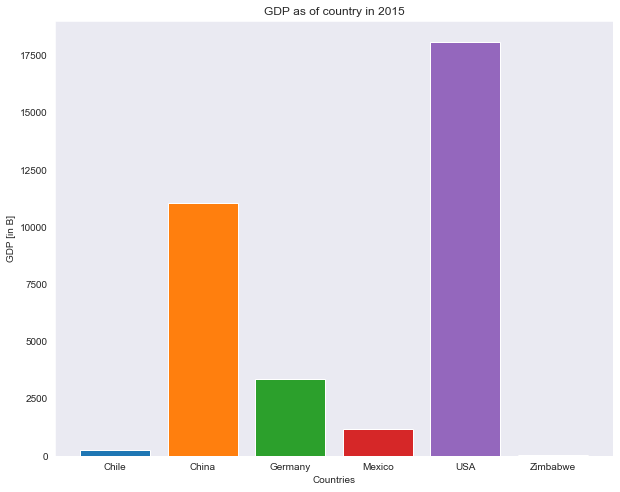

None


In [922]:
def gdp_bar(frame, country, year):
    plt.figure(figsize=(10,8))
    for y in country:
        plt.bar(y, frame.loc[y][year])
        #plt.legend(country_lst, loc=2)
    plt.xlabel('Countries')
    plt.ylabel('GDP [in B]')
    plt.title('GDP as of country in ' + str(year))
    return plt.show()
    
print(gdp_bar(df1, country_lst, 2015))

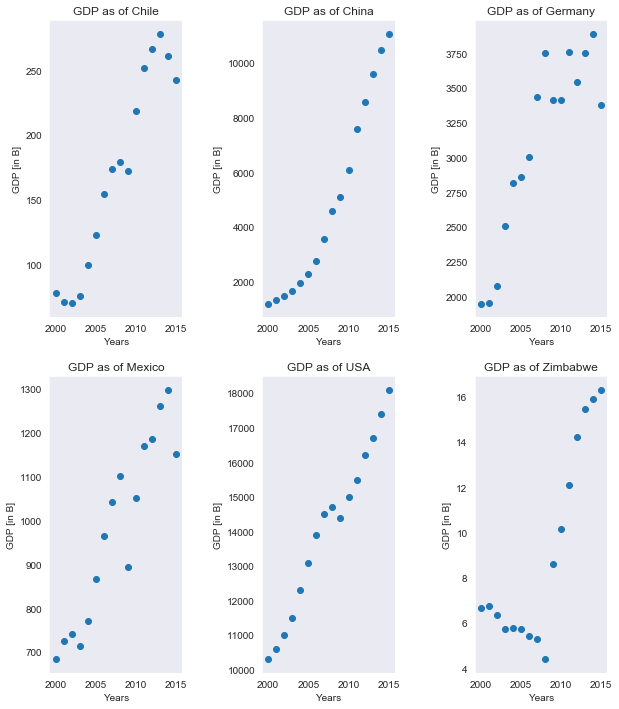

None


In [923]:
# y_values = []
fig = plt.figure(figsize=(10,12))

def gdp_scatter(frame, country):
    for i in range(1, len(country)+1):
        ax=fig.add_subplot(2, 3, i)
        ax.scatter(x_values, frame.iloc[i-1].to_numpy())
        plt.title('GDP as of ' +str(country[i-1]))
        plt.xlabel('Years')
        plt.ylabel('GDP [in B]')
    plt.subplots_adjust(wspace=0.6)
    
    return plt.show()

print(gdp_scatter(df1, country_lst))

In [924]:
df2 = df[['Country', 'Year', 'Life expectancy']]
df2 = df2.pivot_table(values = 'Life expectancy', index = 'Country', columns= 'Year')
df2.rename(index={'Chile':'Chile', 'China':'China', 'Germany': 'Germany', 'Mexico':'Mexico', 'United States of America':'USA', 'Zimbabwe':'Zimbabwe'}, inplace=True)
df2

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,
Chile,77.3,77.3,77.8,77.9,78.0,78.4,78.9,78.9,79.6,79.3,79.1,79.8,79.9,80.1,80.3,80.5
China,71.7,72.2,72.7,73.1,73.5,73.9,74.2,74.4,74.5,74.9,75.0,75.2,75.4,75.6,75.8,76.1
Germany,78.0,78.3,78.4,78.5,79.1,79.2,79.6,79.8,79.9,80.0,80.1,80.5,80.6,80.6,80.9,81.0
Mexico,74.8,75.0,75.0,75.0,75.4,75.3,75.8,76.0,75.6,75.7,75.6,76.1,76.3,76.6,76.6,76.7
USA,76.8,76.9,77.0,77.2,77.5,77.5,77.8,78.1,78.2,78.5,78.7,78.7,78.8,78.9,79.1,79.3
Zimbabwe,46.0,45.3,44.8,44.5,44.3,44.6,45.4,46.6,48.2,50.0,52.4,54.9,56.6,58.0,59.2,60.7


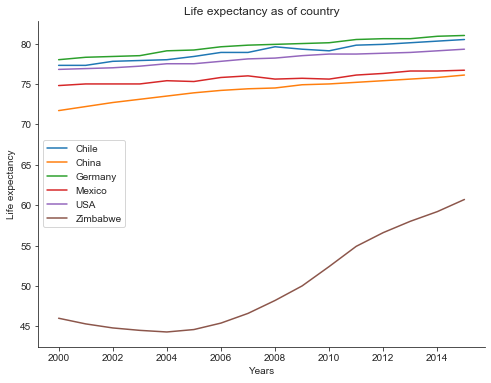

None


In [925]:
def life_ex_line(frame, country):
    plt.figure(figsize=(8,6))
    sns.set_style('ticks')
    
    for y in country:
        sns.lineplot(x=df2.columns, y=df2.loc[y])
    plt.legend(country_lst, loc=6)
    plt.xlabel('Years')
    plt.ylabel('Life expectancy')
    plt.title('Life expectancy as of country')
    sns.despine()
    return plt.show()

print(life_ex_line(df2, country_lst))

In [926]:
df3 = df2.reset_index()
df3

Year,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Chile,77.3,77.3,77.8,77.9,78.0,78.4,78.9,78.9,79.6,79.3,79.1,79.8,79.9,80.1,80.3,80.5
1,China,71.7,72.2,72.7,73.1,73.5,73.9,74.2,74.4,74.5,74.9,75.0,75.2,75.4,75.6,75.8,76.1
2,Germany,78.0,78.3,78.4,78.5,79.1,79.2,79.6,79.8,79.9,80.0,80.1,80.5,80.6,80.6,80.9,81.0
3,Mexico,74.8,75.0,75.0,75.0,75.4,75.3,75.8,76.0,75.6,75.7,75.6,76.1,76.3,76.6,76.6,76.7
4,USA,76.8,76.9,77.0,77.2,77.5,77.5,77.8,78.1,78.2,78.5,78.7,78.7,78.8,78.9,79.1,79.3
5,Zimbabwe,46.0,45.3,44.8,44.5,44.3,44.6,45.4,46.6,48.2,50.0,52.4,54.9,56.6,58.0,59.2,60.7


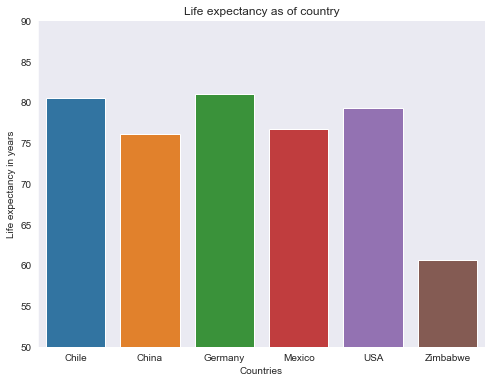

None


In [927]:
def life_ex_bar(frame, country):
    plt.figure(figsize=(8,6))
    sns.set_style('dark')

    ax = sns.barplot(x=frame['Country'], y=frame.iloc[0:len(df3)][2015])
    ax.set(ylim=(50, 90))
    
    #plt.legend(country_lst, loc=6)
    plt.xlabel('Countries')
    plt.ylabel('Life expectancy in years')
    plt.title('Life expectancy as of country')
    sns.despine()
    return plt.show()

print(life_ex_bar(df3, country_lst))

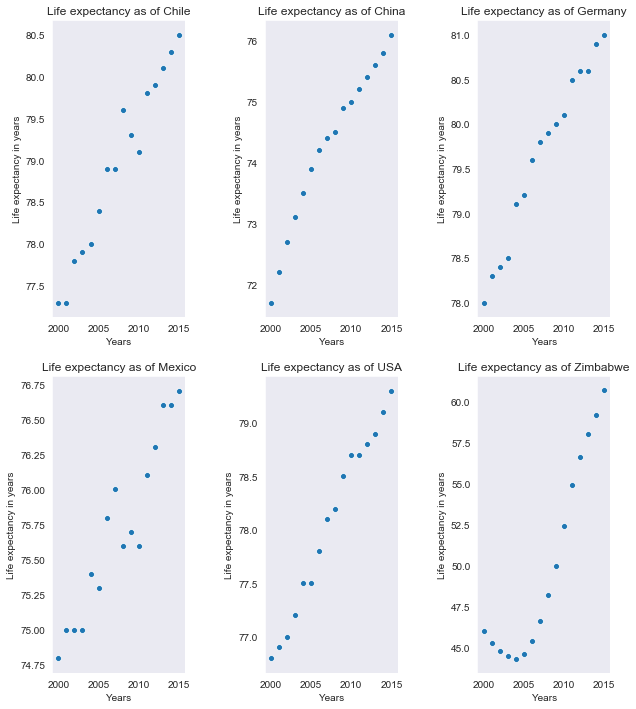

None


In [928]:
fig = plt.figure(figsize=(10,12))

def life_ex_scatter(frame, country):
    for i in range(1, len(country)+1):
        ax=fig.add_subplot(2, 3, i)
        ax=sns.scatterplot(x=frame.columns, y=frame.iloc[i-1])
        plt.title('Life expectancy as of ' +str(country[i-1]))
        plt.xlabel('Years')
        plt.ylabel('Life expectancy in years')
    plt.subplots_adjust(wspace=0.6)
    
    return plt.show()

print(life_ex_scatter(df2, country_lst))

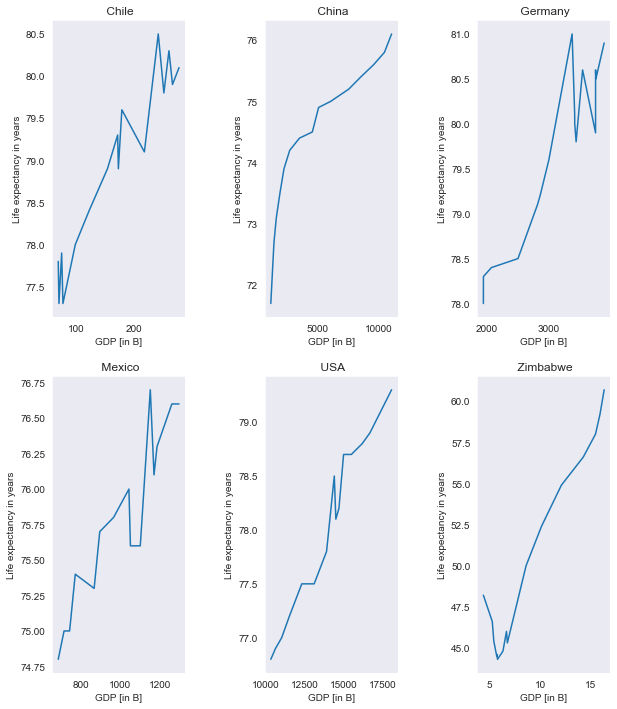

None


In [953]:
fig = plt.figure(figsize=(10,12))

def life_ex_gdp2(frame1, frame2, country):
    for i in range(1, len(country)+1):
        ax=fig.add_subplot(2, 3, i)
        ax=sns.lineplot(x=frame1.iloc[i-1], y=frame2.iloc[i-1])
        plt.title(' '+str(country[i-1]))
        plt.xlabel('GDP [in B]')
        plt.ylabel('Life expectancy in years')
    plt.subplots_adjust(wspace=0.6)
    
    return plt.show()

print(life_ex_gdp2(df1, df2, country_lst))